In [ ]:
import pandas as pd
import pickle
import io
import chess.pgn
from sklearn.metrics import classification_report, root_mean_squared_error, r2_score, PredictionErrorDisplay
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-deep")

In [ ]:
df = pd.read_csv("../data/lichess/lichess_db_puzzle.csv")
df["Themes"] = df["Themes"].str.split()
puzzles = df[["PuzzleId", "Themes", "Rating"]].set_index("PuzzleId").to_dict(orient="index")

In [ ]:
my_pgn = io.StringIO("""1. e4 c5 2. c3 d6 3. d4 b6 4. Nf3 Bg4 5. Bb5+ Nd7 6. O-O a6 7. Bc6
Rc8 8. Bd5 b5 9. Bxf7+ Kxf7 10. Ng5+ Ke8 11. Qxg4 Ngf6 12. Qe6 Nb6 13. e5 Nfd5
14. exd6 Qxd6 15. Qxd6 exd6 16. Nd2 c4 17. Nde4 h6 18. Nf3 Kd7 19. b3 Re8 20.
Ng3 g5 21. Ba3 a5 22. bxc4 Nxc4 23. Bc1 Bg7 24. Rb1 Rb8 25. Ne2 b4 26. cxb4
axb4 27. Nd2 Nxd2 28. Bxd2 Rhe8 29. Rfe1 Re7 30. Ng3 Rxe1+ 31. Rxe1 Bxd4 32. h3
Rf8 33. Be3 Nxe3 34. fxe3 Bc5 35. Rb1 Re8 36. Ne4 Rxe4 37. a3 Bxe3+ 38. Kh2
bxa3 39. Ra1 Bc5 40. Ra2 Rb4 41. g4 Rb2+ 42. Rxb2 axb2 0-1""")
game = chess.pgn.read_game(my_pgn)

fens = []
board = game.board()
fens.append(board.fen())
for move in game.mainline_moves():
    board.push(move)
    fens.append(board.fen())

In [ ]:
def label_error(pred, exp):
    pred_set = set(pred) - {"middlegame", "endgame", "short", "crushing", "advantage", "long"}
    exp_set = set(exp) - {"middlegame", "endgame", "short", "crushing", "advantage", "long"}
    return len(pred_set - exp_set) + len(exp_set - pred_set)

def mse_loss(pred, exp):
    return (pred - exp) ** 2

THEMES = ['advancedPawn', 'advantage', 'anastasiaMate', 'arabianMate', 'attackingF2F7', 'attraction', 'backRankMate', 'bishopEndgame', 'bodenMate', 'capturingDefender', 'castling', 'clearance', 'crushing', 'defensiveMove', 'deflection', 'discoveredAttack', 'doubleBishopMate', 'doubleCheck', 'dovetailMate', 'enPassant', 'endgame', 'equality', 'exposedKing', 'fork', 'hangingPiece', 'hookMate', 'interference', 'intermezzo', 'kingsideAttack', 'knightEndgame', 'long', 'master', 'masterVsMaster', 'mate', 'mateIn1', 'mateIn2', 'mateIn3', 'mateIn4', 'mateIn5', 'middlegame', 'oneMove', 'opening', 'pawnEndgame', 'pin', 'promotion', 'queenEndgame', 'queenRookEndgame', 'queensideAttack', 'quietMove', 'rookEndgame', 'sacrifice', 'short', 'skewer', 'smotheredMate', 'superGM', 'trappedPiece', 'underPromotion', 'veryLong', 'xRayAttack', 'zugzwang']

In [ ]:
with open("tree_results.pkl", "rb") as f:
    tree = pickle.load(f)
tree

In [ ]:
with open("transformer_elo.pkl", "rb") as f:
    transformer = pickle.load(f)
transformer

In [ ]:
tree_ids = list(tree.keys())
y_true = np.zeros((len(tree_ids), len(THEMES)))
y_pred = np.zeros((len(tree_ids), len(THEMES)))
for i, pid in enumerate(tree_ids):
    for j, t in enumerate(THEMES):
        if t in puzzles[pid]["Themes"]:
            y_true[i,j] = 1
        if t in tree[pid]:
            y_pred[i,j] = 1

print(classification_report(y_true, y_pred, target_names=THEMES, digits=4, zero_division=0))

404.47368080450144
0.42558308680981327


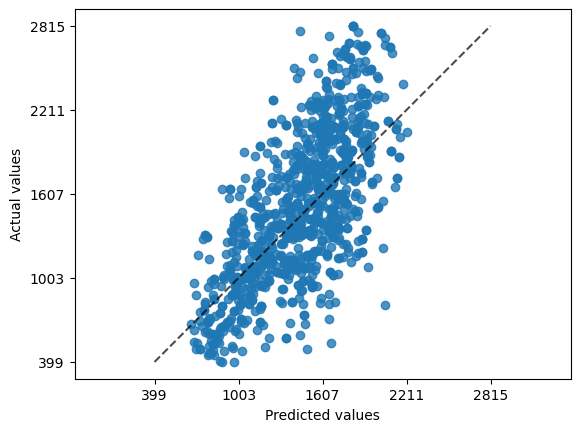

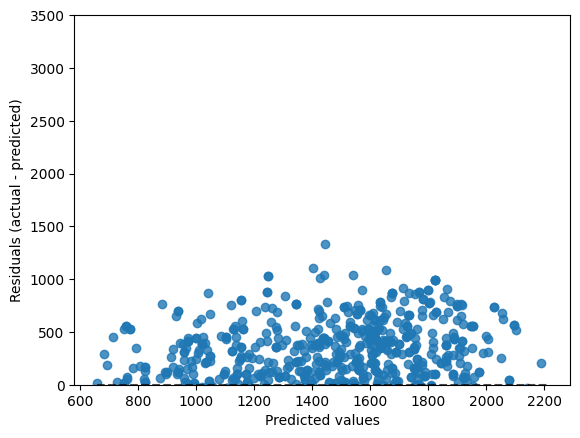

468.3698258192351
0.25932462141285006


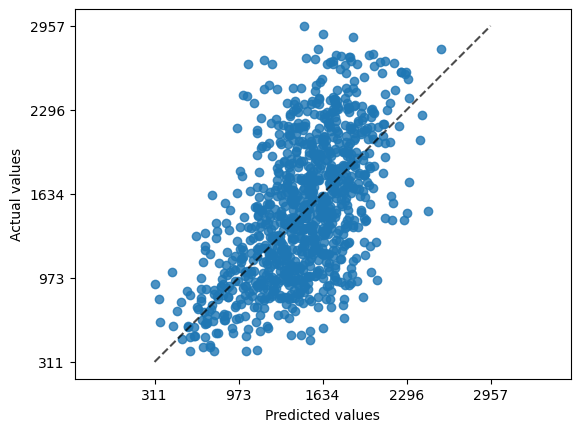

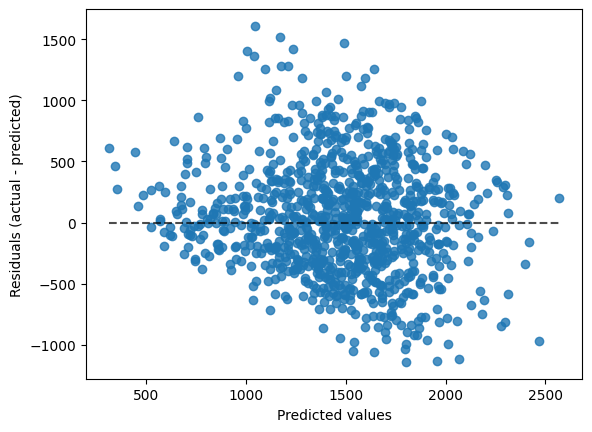

h


In [105]:
tree_ids = list(tree.keys())
y_true = np.zeros(len(tree_ids))
y_pred = np.zeros(len(tree_ids))
for i, pid in enumerate(tree_ids):
    y_true[i] = puzzles[pid]["Rating"]
    y_pred[i] = tree[pid][1]

print(root_mean_squared_error(y_true, y_pred))
print(r2_score(y_true, y_pred))
PredictionErrorDisplay.from_predictions(y_true, y_pred, kind="actual_vs_predicted").plot()
plt.show()

transformer_ids = list(transformer.keys())
y_true = np.zeros(len(transformer_ids))
y_pred = np.zeros(len(transformer_ids))
for i, pid in enumerate(transformer_ids):
    y_true[i] = puzzles[pid]["Rating"]
    y_pred[i] = transformer[pid]

print(root_mean_squared_error(y_true, y_pred))
print(r2_score(y_true, y_pred))
PredictionErrorDisplay.from_predictions(y_true, y_pred, kind="actual_vs_predicted").plot()
plt.show()
print("h")
